# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
   species.(also do random forest algorithm)

In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Read the dataset to the python environment.

In [3]:
data=pd.read_excel('iris (1).xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 5)

**There are 150 rows and 5 columns**

In [7]:
pd.set_option('display.max_columns', None)
data.groupby('Classification').describe()

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                                                                 PL            \
                     mean       std  min  25%  50%   75%  max count      mean   
Classification                                                                  
Iris-setosa      3.408511  0.390557  2.3  3.1  3.4  3.65  4.4  48.0  1.468750   
Iris-versicolor  2.781250  0.315322  2.0  2.6  2.8  3.00  3.4  48.0  4.252083   
Iris-virginica   2.967347  0.322353  2.2  2.8  3.0  3.10  3.8  48.0  5.547917   

                                                         PW                   \
                      std  min  25%   50%    75%  max count   mean       std   
Classification                                                                 
Iris-setosa      0.175228  1.0  1.4  1.50  1.600  1.9  50.0  0.244  0.107210   
Iris-versicolor  0.475345  3.0  4.0  4.35  4.600  5.1  50.0  1.326  0.197753   
Iris-virginica   0.555433  4.5  5.1  5.55  5.825  6.9  50.0  2.026  0.274650   

                                          
                 min  25%  50%  75%  max  
Classification                            
Iris-setosa      0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   1.4  1.8  2.0  2.3  2.5

### 2. Pre-processing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

**There are 3 categories and each one are of same count.**

In [10]:
#missing values

In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**There are Null values in SL, SW, PL**

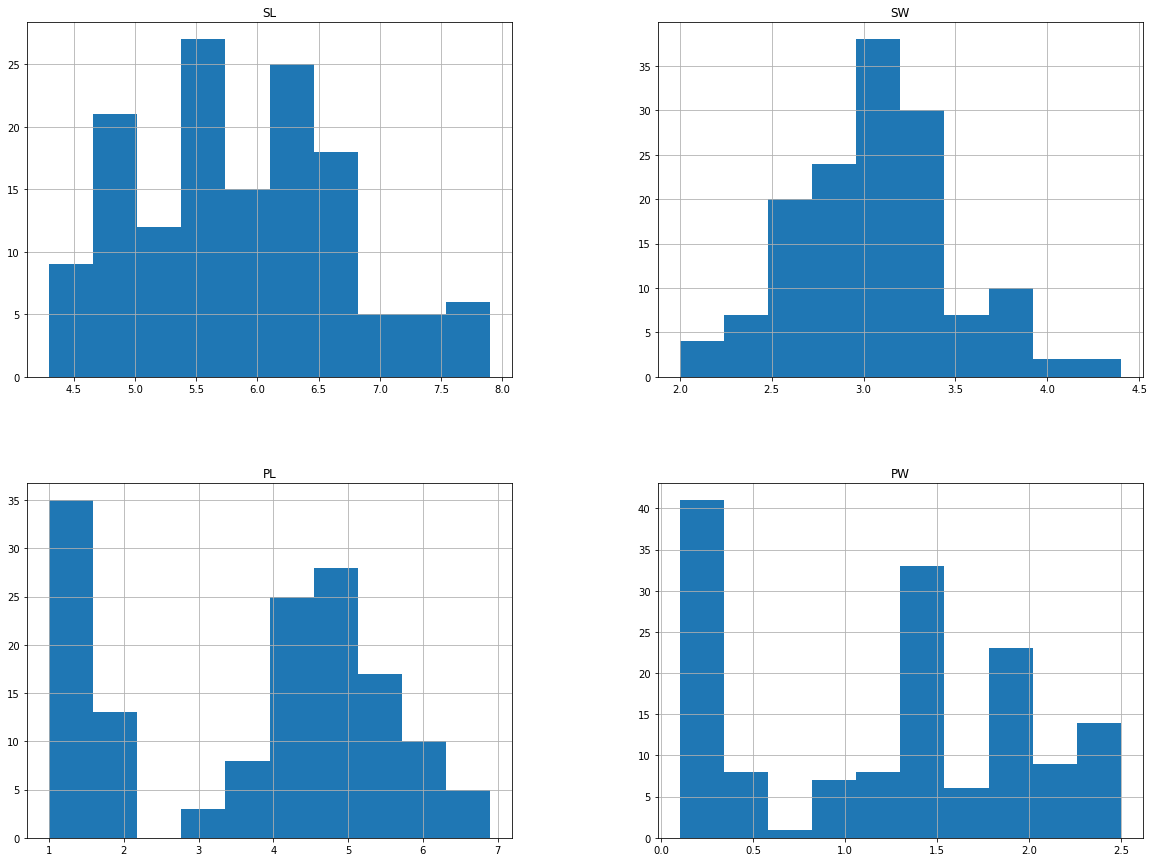

In [12]:
## checking skewness
freqgraph=data.select_dtypes(include="float")
freqgraph.hist(figsize=(20,15))
plt.show()

In [13]:
## Filling Null values with median
data['SL'] =data['SL'].fillna(data['SL'].median())
data['SW'] =data['SW'].fillna(data['SW'].median())
data['PL'] =data['PL'].fillna(data['PL'].median())


In [14]:
## checking
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

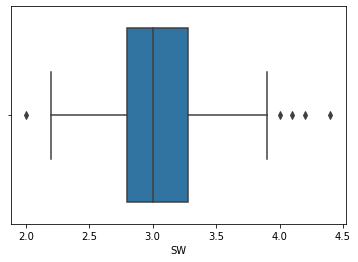

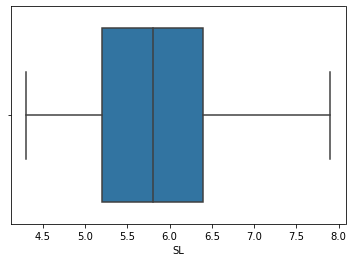

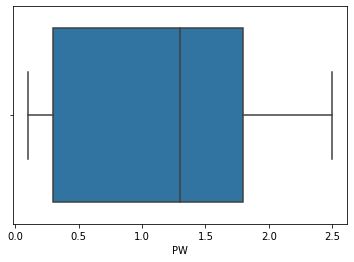

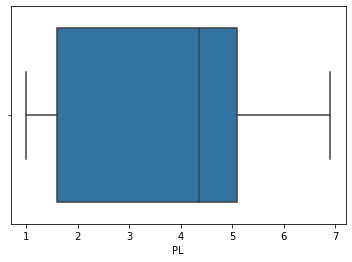

In [15]:
## checking outliers
for i in ['SW','SL', 'PW',
       'PL']:
    #plt.title(i)
    sns.boxplot(x=data[i])
    plt.show() 

**Outliers present in SW**

#### Handling outliers in SW.

In [16]:
q1 = np.percentile(data['SW'],25,interpolation='midpoint')
q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [17]:
IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

In [18]:
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

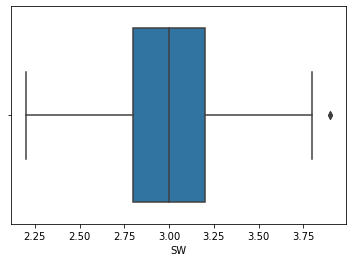

In [19]:
sns.boxplot(x=data['SW'])

In [20]:
# Label Encoding

In [21]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])

In [23]:
data.Classification.unique()

array([0, 1, 2])

In [24]:
x=data.drop('Classification',axis=1)
y=data['Classification']

#### Feature Engineering

In [28]:
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)
x['skew'] = x[['SW', 'SL', 'PW', 'PL']].skew(axis = 1)
x['kurt'] = x[['SW', 'SL', 'PW', 'PL']].kurt(axis = 1)

In [29]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum', 'skew', 'kurt'], dtype='object')

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [30]:
## Spliting of the data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [31]:
#Standard Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [34]:
y_test

74     1
145    2
29     0
21     0
46     0
122    2
131    2
113    2
89     1
20     0
12     0
59     1
133    2
83     1
78     1
40     0
117    2
138    2
105    2
106    2
99     1
141    2
11     0
71     1
35     0
49     0
55     1
81     1
116    2
9      0
4      0
28     0
125    2
130    2
18     0
10     0
123    2
Name: Classification, dtype: int32

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [36]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)

In [37]:
res=[]
res.append(['Logistic Regression',round(accuracy_score(y_test,y_pred),5)])

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

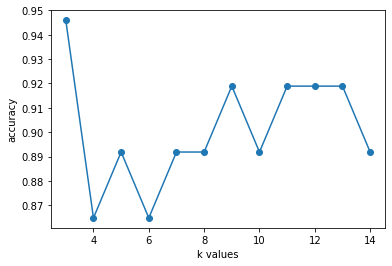

In [39]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")

In [40]:
## k=5
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [41]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [42]:
res.append(['KNN',round(accuracy_score(y_test,y_pred),5)])

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

In [44]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [45]:
res.append(['Random Forest',round(accuracy_score(y_test,y_pred),5)])

### Gradient Booster

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)
y_pred=gm.predict(x_test)

In [47]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [48]:
res.append(['Gradient Booster',round(accuracy_score(y_test,y_pred),5)])

### Extreme Gradient Booster

In [49]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

[10:45:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\data science\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [50]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9777777777777779
recall is : 0.9629629629629629
F1 score is : 0.9688979039891819


In [51]:
res.append(['Extreme Gradient Booster',round(accuracy_score(y_test,y_pred),5)])

### SVM

In [52]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [53]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [54]:
res.append(['Linear SVM',round(accuracy_score(y_test,y_pred),5)])

In [55]:
## polynomial svm
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [56]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.8378378378378378
precision is : 0.8414918414918415
recall is : 0.8439153439153438
F1 score is : 0.8300785634118967


In [57]:
res.append(['Polynomial SVM',round(accuracy_score(y_test,y_pred),5)])

In [58]:
## radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [59]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [60]:
res.append(['Radial SVM',round(accuracy_score(y_test,y_pred),5)])

In [61]:
## converting all accuracy to a dataframe
df = pd.DataFrame(res, columns = ['Algorithms', 'Accuracy'])

In [62]:
df

,Algorithms,Accuracy
0,Logistic Regression,0.94595
1,KNN,0.94595
2,Random Forest,0.94595
3,Gradient Booster,0.94595
4,Extreme Gradient Booster,0.97297
5,Linear SVM,0.94595
6,Polynomial SVM,0.83784
7,Radial SVM,0.91892


- **Extreme Gradient Booster classification model gives the best result to predict iris species.**
- **Logistic Regression,KNN,Random Forest,Gradient Booster,Linear SVM models have same accuracy**